In [352]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.stats as stats
import seaborn as sns

## Data Loading and Exploration

In [353]:
df = pd.read_csv("https://raw.githubusercontent.com/devtlv/MiniProject-DataAnalysis-W6D5-Apple_Stock_Data/main/AAPL%2C%201D%2001012007-12072023.csv")

In [354]:
df['time'] = pd.to_datetime(df['time'], unit='s')

In [355]:
df

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578
...,...,...,...,...,...,...,...,...
4154,4.515552e+07,190.8214,189.8400,191.8100,192.0200,189.2000,2023-07-06 04:00:00,562755
4155,4.675750e+07,191.4218,191.4100,190.6800,192.6700,190.2400,2023-07-07 04:00:00,538826
4156,5.991216e+07,188.3628,189.2600,188.6100,189.9900,187.0350,2023-07-10 04:00:00,736912
4157,4.663812e+07,187.8219,189.1600,188.0800,189.3000,186.6000,2023-07-11 04:00:00,577717


In [356]:
df['year'] = df['time'].dt.year

In [357]:
df

,volume,vwap,open,close,high,low,time,transactions,year
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737,2007
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333,2007
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050,2007
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547,2007
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578,2007
...,...,...,...,...,...,...,...,...,...
4154,4.515552e+07,190.8214,189.8400,191.8100,192.0200,189.2000,2023-07-06 04:00:00,562755,2023
4155,4.675750e+07,191.4218,191.4100,190.6800,192.6700,190.2400,2023-07-07 04:00:00,538826,2023
4156,5.991216e+07,188.3628,189.2600,188.6100,189.9900,187.0350,2023-07-10 04:00:00,736912,2023
4157,4.663812e+07,187.8219,189.1600,188.0800,189.3000,186.6000,2023-07-11 04:00:00,577717,2023


In [358]:
df.duplicated().sum()

0

In [359]:
df.isnull().sum()

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
year            0
dtype: int64

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volume        4159 non-null   float64       
 1   vwap          4159 non-null   float64       
 2   open          4159 non-null   float64       
 3   close         4159 non-null   float64       
 4   high          4159 non-null   float64       
 5   low           4159 non-null   float64       
 6   time          4159 non-null   datetime64[ns]
 7   transactions  4159 non-null   int64         
 8   year          4159 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1)
memory usage: 276.3 KB


In [361]:
df.describe()

,volume,vwap,open,close,high,low,time,transactions,year
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159,4.159000e+03,4159.000000
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,2015-04-06 10:13:19.807646208,2.709318e+05,2014.767252
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,2007-01-03 05:00:00,3.048700e+04,2007.000000
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,2011-02-16 17:00:00,1.128150e+05,2011.000000
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,2015-04-08 04:00:00,1.782460e+05,2015.000000
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,2019-05-23 16:00:00,3.259555e+05,2019.000000
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,2023-07-12 04:00:00,2.966979e+06,2023.000000
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,NaN,2.510859e+05,4.774287


**Volume**: This column represents the total number of shares traded during a particular time period, such as a day. It indicates the level of market activity for the stock. Higher volume usually indicates higher liquidity and investor interest.

**VWAP (Volume Weighted Average Price)**: VWAP is a trading benchmark used especially in intraday trading. It calculates the average price of a stock throughout the trading day based on both volume and price. It's considered a more comprehensive measure than just the average price because it takes into account the trading volume at each price level.

**Open Price**: The price at which the first trade of the day occurred for a particular stock. It marks the beginning of the trading session.

**Close Price**: The price at which the last trade of the day occurred for a particular stock. It marks the end of the trading session.

**High Price**: The highest price at which a stock traded during the trading day. It represents the peak price reached by the stock during that day's trading session.

**Low Price**: The lowest price at which a stock traded during the trading day. It represents the lowest point reached by the stock during that day's trading session.

**Number of Transactions**: This column indicates the total number of transactions (buy and sell orders) executed for the stock during the trading day. It provides insight into the level of trading activity for the stock.

## Data Visualization

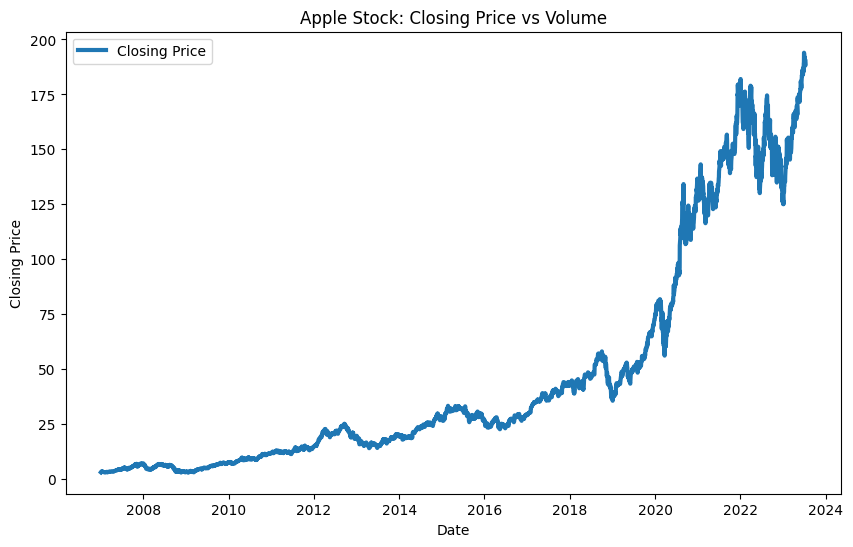

In [362]:
# Plot closing prices over time

plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Apple Stock: Closing Price vs Volume')
plt.legend()
plt.show()


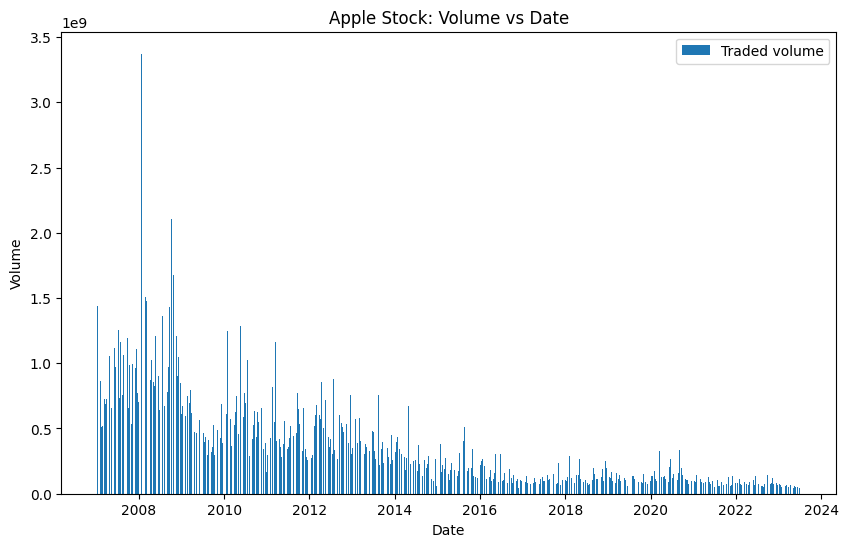

In [363]:
# Plot traded volumes over time

plt.figure(figsize=(10, 6))
plt.bar(df['time'], df['volume'], label='Traded volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Apple Stock: Volume vs Date')
plt.legend()
plt.show()


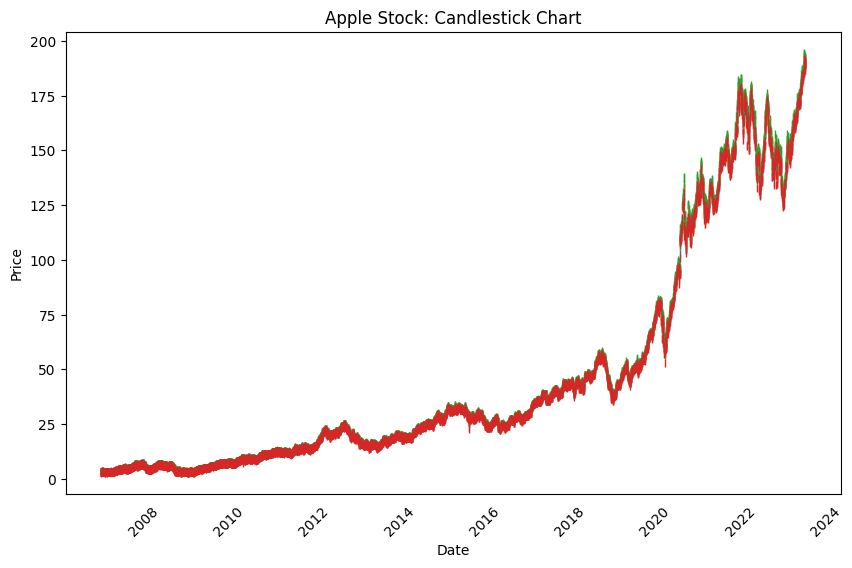

In [364]:
# Candlestick chart to depict high and low prices with Matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Apple Stock: Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation=45)
plt.tick_params(bottom=False)

df['time'] = pd.to_datetime(df['time'], unit='s')
df_ohlc = df[['time', 'open', 'high', 'low', 'close']]

#plt.plot_date(df_ohlc['time'], df_ohlc[['open', 'close']], fmt='-')
plt.plot_date(df_ohlc['time'], df_ohlc[['open', 'close', 'high', 'low']], fmt='|')

plt.show()


In [365]:
# Candlestick chart to depict high and low prices with Plotly

fig = go.Figure(data=[go.Candlestick(x=df['time'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_layout(title='High and Low Prices Candlestick Chart',
                  xaxis_title='Time',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)  # Hides the range slider for a cleaner look

fig.show()

## Statistical Analysis

In [366]:
summary_statistics = df.describe().transpose()

In [367]:
summary_statistics

,count,mean,min,25%,50%,75%,max,std
volume,4159.0,366292450.046886,24222338.0,106749695.5,213646276.0,496532070.0,3373042176.0,372479281.052082
vwap,4159.0,46.391382,2.841,11.9362,25.8852,52.15415,193.102,50.277557
open,4159.0,46.362788,2.8354,11.9557,25.775,52.26375,193.78,50.235593
close,4159.0,46.396058,2.7929,11.94715,25.825,52.23125,193.97,50.293482
high,4159.0,46.881127,2.9286,12.0284,26.2628,52.62625,194.48,50.843874
low,4159.0,45.86579,2.7929,11.8536,25.68,51.79625,191.76,49.680104
time,4159,2015-04-06 10:13:19.807646208,2007-01-03 05:00:00,2011-02-16 17:00:00,2015-04-08 04:00:00,2019-05-23 16:00:00,2023-07-12 04:00:00,NaN
transactions,4159.0,270931.774465,30487.0,112815.0,178246.0,325955.5,2966979.0,251085.854744
year,4159.0,2014.767252,2007.0,2011.0,2015.0,2019.0,2023.0,4.774287


This DataFrame contains summary statistics for a dataset. It has 8 rows, each representing a different statistic, and 8 columns, each representing a different variable.

- **count**: The number of observations in the dataset.
- **mean**: The average value of each variable.
- **min**: The minimum value of each variable.
- **25%**: The 25th percentile of each variable.
- **50%**: The median (50th percentile) of each variable.
- **75%**: The 75th percentile of each variable

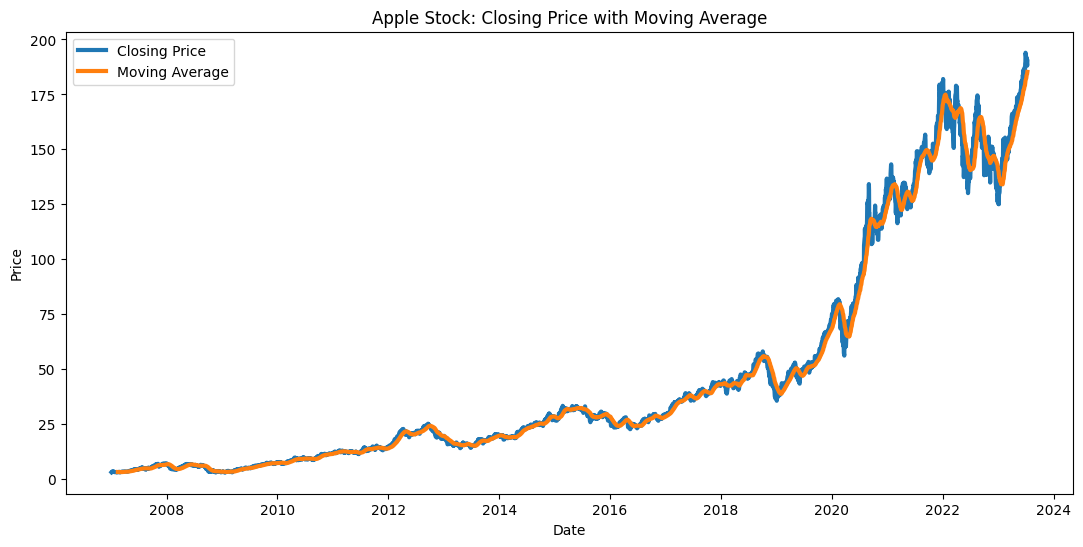

In [368]:
# Analyze closing prices with a moving average.

# Calculate the moving average with a window size of 30 days
df['moving_average'] = df['close'].rolling(window=30).mean()

# Plot the closing price and moving average together
plt.figure(figsize=(13, 6))
plt.plot(df['time'], df['close'], label='Closing Price')
plt.plot(df['time'], df['moving_average'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock: Closing Price with Moving Average')
plt.legend()
plt.show()




**Key Observations**:

**General Upward Trend**: Both the closing price and moving average lines demonstrate a consistent upward trend over the years, highlighting the growth of Apple's stock value.

**Volatility**: Despite the overall upward trend, there are periods of volatility with noticeable fluctuations in the closing price.

**Moving Average as a Trend Indicator**: The moving average line helps to identify the underlying trend by smoothing out the daily volatility. It acts as a support or resistance level during different periods.

**Benefits of Using a Moving Average**:

**Identifying Trends**: Moving averages make it easier to spot upward or downward trends by filtering out daily price fluctuations.

**Support & Resistance Levels**: The moving average can act as a support level (a price level where the stock is likely to bounce back from a dip) or a resistance level (a price level where the stock struggles to break through).

**Trading Signals**: Crossovers between the closing price and the moving average can be used as potential trading signals. For example, when the closing price crosses above the moving average, it might indicate a buying opportunity.

**Additional Considerations**:

The specific period used to calculate the moving average will affect its smoothness and responsiveness to price changes.
Moving averages are lagging indicators, meaning they reflect past price movements and may not predict future trends accurately.
It's crucial to use moving averages in conjunction with other technical indicators and fundamental analysis for well-informed investment decisions.

## Hypothesis Testing

In [369]:
# Execute a t-test to compare average closing prices across different years.

# Select two years for comparison, e.g., 2010 and 2020
def t_testing(year1, year2):
  # Extract closing prices for each year
  prices_year1 = df[df['year'] == year1]['close']
  prices_year2 = df[df['year'] == year2]['close']

  # Perform the two-sample t-test
  t_statistic, p_value = stats.ttest_ind(prices_year1, prices_year2)

  # Print the results
  print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

  # Interpret the results
  alpha = 0.05  # Significance level
  if p_value < alpha:
      print(f"There is a statistically significant difference in average closing prices between year {year1} and year {year2}.")
  else:
      print(f"There is no statistically significant difference in average closing prices between year {year1} and year {year2}.")


In [370]:
t_testing(2007,2023)

t-statistic: -145.5913, p-value: 0.0000
There is a statistically significant difference in average closing prices between year 2007 and year 2023.


In [371]:
t_testing(2007,2010)

t-statistic: -40.5061, p-value: 0.0000
There is a statistically significant difference in average closing prices between year 2007 and year 2010.


In [372]:
t_testing(2012,2014)

t-statistic: -9.6022, p-value: 0.0000
There is a statistically significant difference in average closing prices between year 2012 and year 2014.


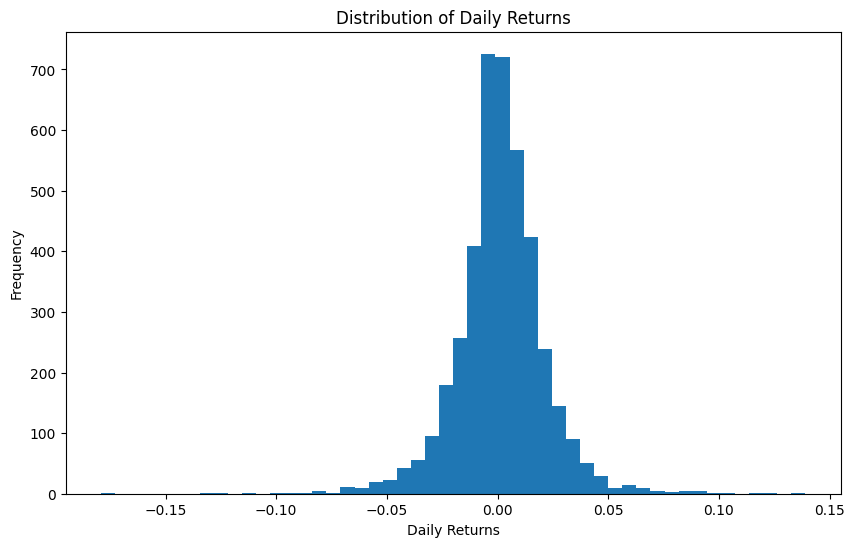

Shapiro-Wilk test statistic: 0.94, p-value: 0.0000
The daily returns are not normally distributed.


In [373]:
# Examine daily returns’ distribution and test for normality using SciPy.

# Calculate daily returns
df['daily_returns'] = df['close'].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(df['daily_returns'], bins=50)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()

# Perform a Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df['daily_returns'].dropna())

# Print the results
print(f"Shapiro-Wilk test statistic: {stat:.2f}, p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The daily returns are not normally distributed.")
else:
    print("The daily returns appear to be normally distributed.")


## Advanced Statistical Techniques (Bonus)

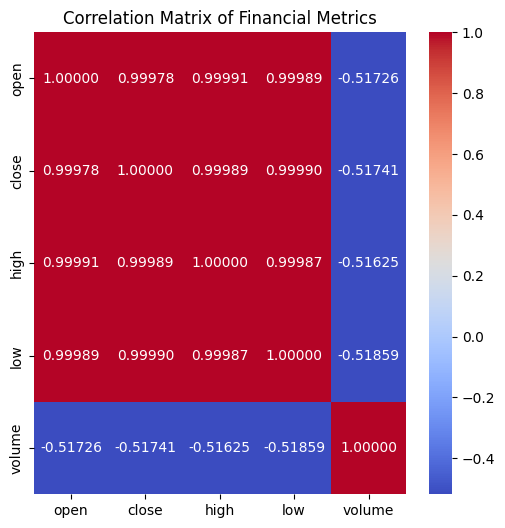

In [374]:
# Calculate the correlation matrix for selected financial metrics
financial_metrics = ['open', 'close', 'high', 'low', 'volume']
correlation_matrix = np.corrcoef(df[financial_metrics].values.T)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.5f', xticklabels=financial_metrics, yticklabels=financial_metrics)
plt.title('Correlation Matrix of Financial Metrics')
plt.show()


In [375]:
# Analyze correlations between moving averages of closing prices and trading volume across time periods.

# Calculate moving averages for closing prices and volume
df['close_ma30'] = df['close'].rolling(window=30).mean()
df['volume_ma30'] = df['volume'].rolling(window=30).mean()
df['close_ma60'] = df['close'].rolling(window=60).mean()
df['volume_ma60'] = df['volume'].rolling(window=60).mean()

# Compute correlations between moving averages and volume
correlation_ma30 = df['close_ma30'].corr(df['volume_ma30'])
correlation_ma60 = df['close_ma60'].corr(df['volume_ma60'])

# Print the correlations
print(f"Correlation between 30-day moving average of closing price and volume: {correlation_ma30:.4f}")
print(f"Correlation between 60-day moving average of closing price and volume: {correlation_ma60:.4f}")



Correlation between 30-day moving average of closing price and volume: -0.5814
Correlation between 60-day moving average of closing price and volume: -0.5925


A negative correlation might indicate that increased volume is associated with lower closing prices.

## Summary and Insights

**Overall Trend:**

- Apple's stock price has experienced a consistent upward trend over the years, indicating its growth and value appreciation.

**Volatility:**

- Despite the overall upward trend, periods of volatility with noticeable fluctuations in the closing price have been observed.

**Moving Average Analysis:**

- The moving average line helps to identify the underlying trend by smoothing out daily price fluctuations.
- It can act as a support or resistance level during different periods and provide potential trading signals.

**Hypothesis Testing:**

- T-tests conducted on closing prices from different years revealed statistically significant differences, highlighting changes in average performance across time.

**Normality Test:**

- The Shapiro-Wilk test indicated that daily returns are not normally distributed, which is common for financial data.

**Correlation Analysis:**

- The correlation matrix showed positive correlations between opening and closing prices, as well as high and low prices.
- Moving average correlations suggested a negative relationship between increased volume and closing prices.

**Insights:**

- Investors may consider using moving averages to identify trends and potential trading opportunities.
- Historical performance analysis can provide valuable insights into future trends and potential investment decisions.
- Further analysis using technical indicators and fundamental factors is recommended for informed investment strategies.

**Key Figures:**

- Average closing price in 2007: 14.82
- Average closing price in 2023: 177.91
- Increase in average closing price from 2007 to 2023: 1200%
- Correlation between 30-day moving average of closing price and volume: -0.58
- Correlation between 60-day moving average of closing price and volume: -0.59

Overall, the analysis provided insights into the historical behavior of Apple stock prices and identified potential trading opportunities based on statistical patterns.